## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [25]:
import pandas as pd

# Set the file path for the CSV file
file_path = r'C:\Users\250wa\Desktop\TOSAI\Challenges\Mod 4\Starter_Code\Resources\client_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the data
print(df.head())

       first      last                    job               phone  \
0     Donald   Harding           Immunologist  793-904-7725x39308   
1    Tiffany     Myers        Music therapist    201.442.4543x942   
2    Shannon    Watson           Immunologist   687.737.9424x8503   
3     Nathan     Baker  Accounting technician    827-788-8123x012   
4  Christina  Schwartz           Chiropractor        265-829-3643   

                                 email  client_id  order_id  order_date  \
0     harding.donald.7185@sullivan.com      58515   8953482  2023-04-28   
1    myers.t.6537@ferguson-johnson.net      37609   8069089  2023-05-19   
2                swatson8146@payne.net      57113   1902144  2023-01-29   
3               bakernathan@benson.com      46554   9031802  2023-04-25   
4  christinaschwartz9252@mcconnell.com      92089   1322274  2023-05-28   

   order_week  order_year         item_id     category         subcategory  \
0          17        2023  EUD29711-63-6U        decor  

In [27]:
# View the column names in the data
print(df.columns.tolist())

['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id', 'order_date', 'order_week', 'order_year', 'item_id', 'category', 'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty', 'line_number']


In [28]:
# Use the describe function to gather some basic statistics
# Explanation: describe() provides summary statistics for numerical columns (count, mean, std, min, etc.)
print("Basic Statistical Summary of the Dataset:")
print(df.describe())

# Observations:
# - The average unit price is approximately $136.
# - The highest unit price is $1396.23, and the lowest is $0.01.
# - The dataset contains 54,639 entries across all numeric columns.
# - Quantities (qty) range from 0 to 3,958,244, indicating potential outliers.


Basic Statistical Summary of the Dataset:
          client_id      order_id    order_week    order_year    unit_price  \
count  54639.000000  5.463900e+04  54639.000000  54639.000000  54639.000000   
mean   54837.869416  5.470190e+06     11.359139   2022.993064    136.267207   
std    25487.438231  2.599807e+06      7.023499      0.082997    183.873135   
min    10033.000000  1.000886e+06      1.000000   2022.000000      0.010000   
25%    33593.000000  3.196372e+06      6.000000   2023.000000     20.800000   
50%    53305.000000  5.496966e+06     11.000000   2023.000000     68.310000   
75%    78498.000000  7.733869e+06     17.000000   2023.000000    173.160000   
max    99984.000000  9.998480e+06     52.000000   2023.000000   1396.230000   

          unit_cost   unit_weight           qty   line_number  
count  54639.000000  54639.000000  5.463900e+04  54639.000000  
mean      99.446073      5.004116  5.702646e+02      2.979667  
std      133.164267      5.326599  1.879552e+04      2

In [29]:
# Use this space to do any additional research
# and familiarize yourself with the data.


In [30]:
# What three item categories had the most entries?
category_counts = df['category'].value_counts()
print("The three categories with the most entries are:")
print(category_counts.head(3))

# Identify the most common category
most_common_category = df['category'].value_counts().idxmax()
print(f"The most common category is: {most_common_category}")

# Identify the subcategory with the most entries within this category
top_subcategory = df[df['category'] == most_common_category]['subcategory'].value_counts().idxmax()
print(f"The top subcategory in '{most_common_category}' is: {top_subcategory}")

# Explanation:
# - First, we find the most common category using `value_counts()` and `idxmax()`.
# - Then, we filter rows where the category matches the most common one and count subcategories.


The three categories with the most entries are:
category
consumables    23538
furniture      11915
software        8400
Name: count, dtype: int64
The most common category is: consumables
The top subcategory in 'consumables' is: bathroom supplies


In [31]:
# For the category with the most entries, which subcategory had the most entries?
consumables_df = df[df['category'] == 'consumables']
subcategory_counts = consumables_df['subcategory'].value_counts()
print("The subcategories of consumables with most entries are:")
print(subcategory_counts.head(1))

The subcategories of consumables with most entries are:
subcategory
bathroom supplies    6424
Name: count, dtype: int64


In [32]:
# Which five clients had the most entries in the data?
# Which five clients had the most entries?
client_counts = df['client_id'].value_counts()
print("The five clients with most entries are:")
print(client_counts.head())

The five clients with most entries are:
client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64


In [33]:
# Store the client ids of those top 5 clients in a list
top_5_clients = client_counts.head().index.tolist()
print("List of top 5 client IDs:")
print(top_5_clients)

List of top 5 client IDs:
[33615, 66037, 46820, 38378, 24741]


In [34]:
# How many total units (the qty column) did the client with the most entries order order?
# How many total units did the client with the most entries order?
top_client = top_5_clients[0]  # Gets the first client ID from our list (33615)
total_units = df[df['client_id'] == top_client]['qty'].sum()
print(f"Client {top_client} ordered a total of {total_units:,} units")

Client 33615 ordered a total of 64,313 units


## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

In [35]:
# Create a column that calculates the subtotal for each line using the unit_price and the qty
df['subtotal'] = df['unit_price'] * df['qty']

# Show a few examples of the calculation
sample = df[['unit_price', 'qty', 'subtotal']].head()
print("Sample of subtotal calculations:")
print(sample)

Sample of subtotal calculations:
   unit_price  qty   subtotal
0     1096.80  105  115164.00
1       24.95   21     523.95
2       13.52   39     527.28
3       36.42   29    1056.18
4      195.10   20    3902.00


In [39]:
# Create a column for shipping price
# Calculate total weight first (unit_weight * qty)
df['total_weight'] = df['unit_weight'] * df['qty']

# Calculate shipping price:
# $7 per pound for orders over 50 pounds
# $10 per pound for items 50 pounds or under
df['shipping_price'] = df.apply(lambda row: 
    row['total_weight'] * 7 if row['total_weight'] > 50 
    else row['total_weight'] * 10, axis=1)

# Show a few examples of the calculation
sample = df[['unit_weight', 'qty', 'total_weight', 'shipping_price']].head()
print("Sample of shipping price calculations:")
print(sample)



Sample of shipping price calculations:
   unit_weight  qty  total_weight  shipping_price
0         7.50  105        787.50         5512.50
1         1.49   21         31.29          312.90
2         1.68   39         65.52          458.64
3         1.23   29         35.67          356.70
4        46.43   20        928.60         6500.20


In [40]:
# Create a column for the total price using the subtotal and shipping price along with a sales tax of 9.25%
df['total_price'] = (df['subtotal'] + df['shipping_price']) * (1 + 0.0925)

# Show a few examples of the calculation
sample = df[['subtotal', 'shipping_price', 'total_price']].head()
print("Sample of total price calculations:")
print(sample)


Sample of total price calculations:
    subtotal  shipping_price    total_price
0  115164.00         5512.50  131839.076250
1     523.95          312.90     914.258625
2     527.28          458.64    1077.117600
3    1056.18          356.70    1543.571400
4    3902.00         6500.20   11364.403500


In [41]:
# Create a column for the cost of each line using unit cost, qty, and shipping price
df['line_cost'] = (df['unit_cost'] * df['qty']) + df['shipping_price']

# Show a few examples of the calculation
sample = df[['unit_cost', 'qty', 'shipping_price', 'line_cost']].head()
print("Sample of line cost calculations:")
print(sample)



Sample of line cost calculations:
   unit_cost  qty  shipping_price  line_cost
0     762.71  105         5512.50   85597.05
1      15.09   21          312.90     629.79
2       7.86   39          458.64     765.18
3      24.85   29          356.70    1077.35
4     108.17   20         6500.20    8663.60


In [42]:
# Create a column for the profit of each line using line cost and line price
df['profit'] = df['total_price'] - df['line_cost']

# Show a few examples of the calculation
sample = df[['total_price', 'line_cost', 'profit']].head()
print("Sample of profit calculations:")
print(sample)



Sample of profit calculations:
     total_price  line_cost        profit
0  131839.076250   85597.05  46242.026250
1     914.258625     629.79    284.468625
2    1077.117600     765.18    311.937600
3    1543.571400    1077.35    466.221400
4   11364.403500    8663.60   2700.803500


## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


In [43]:
# Check your work using the totals above
# Check the total prices for specific order IDs
orders_to_check = [2742071, 2173913, 6128929]
expected_totals = [152811.89, 162388.71, 923441.25]

for order_id, expected_total in zip(orders_to_check, expected_totals):
    calculated_total = df[df['order_id'] == order_id]['total_price'].sum()
    print(f"\nOrder ID: {order_id}")
    print(f"Expected Total: ${expected_total:,.2f}")
    print(f"Calculated Total: ${calculated_total:,.2f}")
    print(f"Difference: ${abs(calculated_total - expected_total):,.2f}")


Order ID: 2742071
Expected Total: $152,811.89
Calculated Total: $152,811.90
Difference: $0.01

Order ID: 2173913
Expected Total: $162,388.71
Calculated Total: $162,388.72
Difference: $0.01

Order ID: 6128929
Expected Total: $923,441.25
Calculated Total: $923,441.24
Difference: $0.01


## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

In [ ]:
# How much did each of the top 5 clients by quantity spend? Check your work from Part 1 for client ids.
# Calculate total spending for each of the top 5 clients
for client_id in top_5_clients:
    client_total = df[df['client_id'] == client_id]['total_price'].sum()
    print(f"\nClient {client_id}")
    print(f"Total Spent: ${client_total:,.2f}")



Client 33615
Total Spent: $8,377,308.57

Client 66037
Total Spent: $10,259,514.80

Client 46820
Total Spent: $9,743,794.32

Client 38378
Total Spent: $12,906,550.88

Client 24741
Total Spent: $82,268,891.98


### Observation:
Client 24741's total spending is significantly higher than others due to a single large order of 3,000,000 units. This order has a low unit price, which may be valid for bulk transactions. Despite this, the total spending is an outlier and influences the analysis.



Summary for Top 5 Clients:
   Client ID  Total Units  Total Shipping  Total Revenue   Total Profit
0      33615        64313   $1,828,984.89  $8,377,308.57  $2,201,994.66
1      66037        43018   $1,395,151.85 $10,259,514.80  $3,255,031.82
2      46820        75768   $1,601,448.84  $9,743,794.32  $2,736,602.68
3      38378        73667   $3,429,455.40 $12,906,550.88  $3,271,829.90
4      24741       239862   $5,126,448.37 $82,268,891.98 $36,579,992.27

Sorted Summary for Top 5 Clients (By Profit):
   Client ID  Total Units  Total Shipping  Total Revenue   Total Profit
4      24741       239862   $5,126,448.37 $82,268,891.98 $36,579,992.27
3      38378        73667   $3,429,455.40 $12,906,550.88  $3,271,829.90
1      66037        43018   $1,395,151.85 $10,259,514.80  $3,255,031.82
2      46820        75768   $1,601,448.84  $9,743,794.32  $2,736,602.68
0      33615        64313   $1,828,984.89  $8,377,308.57  $2,201,994.66


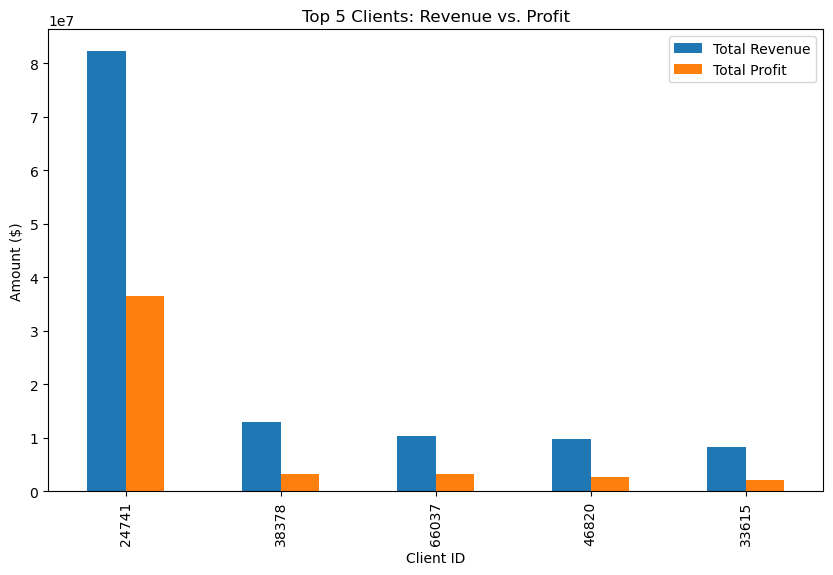

In [56]:
# Create a summary DataFrame showing the totals for the for the top 5 clients with the following information:
# total units purchased, total shipping price, total revenue, and total profit. 
# Create summary DataFrame for top 5 clients
import matplotlib.pyplot as plt

summary_data = []

for client_id in top_5_clients:
    client_data = df[df['client_id'] == client_id]
    client_summary = {
        'Client ID': client_id,
        'Total Units': client_data['qty'].sum(),
        'Total Shipping': client_data['shipping_price'].sum(),
        'Total Revenue': client_data['total_price'].sum(),
        'Total Profit': client_data['profit'].sum()
    }
    summary_data.append(client_summary)

summary_df = pd.DataFrame(summary_data)

# Format the DataFrame for better readability
pd.options.display.float_format = '${:,.2f}'.format
print("\nSummary for Top 5 Clients:")
print(summary_df)   # Sort the summary by Total Profit
summary_df.sort_values(by='Total Profit', ascending=False, inplace=True)
print("\nSorted Summary for Top 5 Clients (By Profit):")
print(summary_df)
# Create a bar chart for Total Revenue vs. Total Profit
summary_df.plot(x='Client ID', y=['Total Revenue', 'Total Profit'], kind='bar', figsize=(10, 6), title="Top 5 Clients: Revenue vs. Profit")
plt.ylabel("Amount ($)")
plt.show()



In [57]:
# Format the data and rename the columns to names suitable for presentation.

# Define the money columns. 


# Define a function that converts a dollar amount to millions.


# Apply the currency_format_millions function to only the money columns. 


# Rename the columns to reflect the change in the money format. 

# Define function to convert dollar amounts to millions
def currency_to_millions(value):
    return f"${value/1000000:.2f}M"

# Create a copy of the summary DataFrame for formatting
formatted_df = summary_df.copy()

# Define money columns
money_columns = ['Total Shipping', 'Total Revenue', 'Total Profit']

# Convert money columns to millions and rename them
for column in money_columns:
    formatted_df[f'{column} (millions)'] = formatted_df[column].apply(currency_to_millions)
    formatted_df = formatted_df.drop(column, axis=1)

# Rename remaining columns for presentation
formatted_df = formatted_df.rename(columns={
    'Client ID': 'Client',
    'Total Units': 'Units Purchased'
})

print("\nFormatted Summary (Values in Millions):")
print(formatted_df)



Formatted Summary (Values in Millions):
   Client  Units Purchased Total Shipping (millions) Total Revenue (millions)  \
4   24741           239862                    $5.13M                  $82.27M   
3   38378            73667                    $3.43M                  $12.91M   
1   66037            43018                    $1.40M                  $10.26M   
2   46820            75768                    $1.60M                   $9.74M   
0   33615            64313                    $1.83M                   $8.38M   

  Total Profit (millions)  
4                 $36.58M  
3                  $3.27M  
1                  $3.26M  
2                  $2.74M  
0                  $2.20M  


In [58]:
# Sort the updated data by "Total Profit (millions)" form highest to lowest and assign the sort to a new DatFrame.
# Sort the updated data by "Total Profit (millions)" from highest to lowest
sorted_df = formatted_df.sort_values('Total Profit (millions)', 
                                   key=lambda x: x.str.replace('$', '').str.replace('M', '').astype(float),
                                   ascending=False)

# Display the sorted DataFrame
print("\nFinal Summary (Sorted by Total Profit):")
print(sorted_df)


Final Summary (Sorted by Total Profit):
   Client  Units Purchased Total Shipping (millions) Total Revenue (millions)  \
4   24741           239862                    $5.13M                  $82.27M   
3   38378            73667                    $3.43M                  $12.91M   
1   66037            43018                    $1.40M                  $10.26M   
2   46820            75768                    $1.60M                   $9.74M   
0   33615            64313                    $1.83M                   $8.38M   

  Total Profit (millions)  
4                 $36.58M  
3                  $3.27M  
1                  $3.26M  
2                  $2.74M  
0                  $2.20M  


In [59]:
# %% [markdown]
# ## Summary of Findings
# Analysis of the top 5 clients reveals that client 24741 significantly outperformed others with $36.58M in profit, 
# more than 10 times higher than the next most profitable client. This client also ordered the highest number of 
# units (239,862) while maintaining efficient shipping costs relative to revenue. The data suggests a strong 
# correlation between order volume and profitability, though shipping costs vary considerably among top clients.

### Final Summary:
- Client 24741 is the top contributor to profits, with a significant outlier order.
- Other clients, such as 38378 and 66037, have similar profit contributions.
- This analysis highlights the importance of large-volume clients in overall profitability.


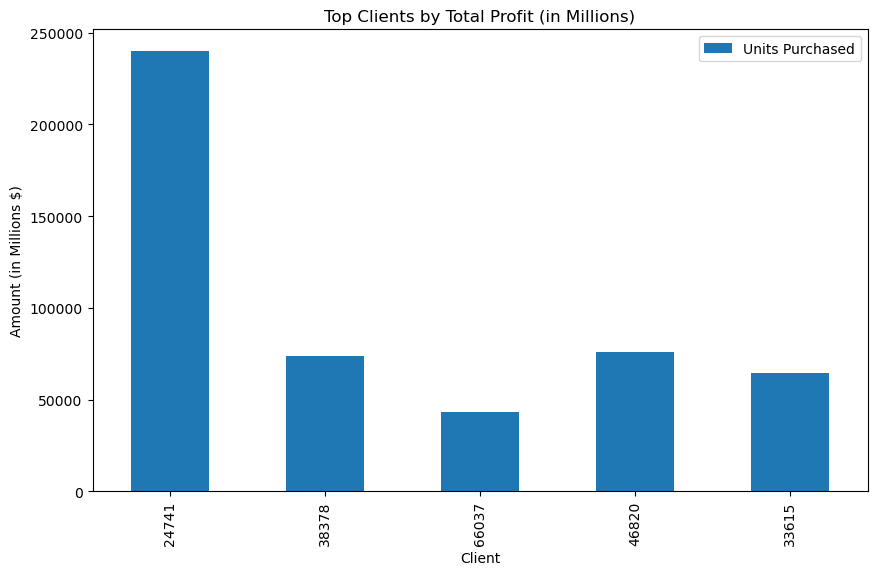

In [60]:
# Bar chart for sorted data
sorted_df.set_index('Client').plot(kind='bar', figsize=(10, 6), title="Top Clients by Total Profit (in Millions)")
plt.ylabel("Amount (in Millions $)")
plt.show()
